# Decision Tree
This notebook is a summary on the usage of **decision tree** algorithm package in **scikit-learn**. 

Two main class for decision tree is `DecisionTreeClassifier` and `DecisionTreeRegressor`.

## DecisionTreeClassifier
**DecisionTreeClassifier** is a class capable of performing multi-class classification on a dataset.

### Main parameters
Here are some introduction for main paranmeters in **DecisionTreeClaasifier**.

#### criterion
The function to measure the quality of a split. 

Either **"gini"** or **"entropy"** can be used, the former representing the Gini coefficient and the latter representing the information gain. Default **"gini"**.

#### splitter
The strategy used to choose the split at each node. 

Supported strategies are **"best"** to choose the best split and **"random"** to choose the best random split. Default **"best"**. 

The default **"best"** is suitable when the sample size is small, and if the sample data size is very large, **"random"** is recommended.

#### max_features
The number of features to consider when looking for the best split.

Many types of values can be used, the default is **"None"**, which means that all features are considered when dividing.

if it is **"log2"**, it means that at most $log_2N$ features are considered when dividing

if it is **"sqrt"** or **"auto"** means at most $\sqrt{N}$ features are considered when dividing. 

If it is an **integer**, it represents the absolute number of features under consideration. If it is a **float**, it represents the percentage of features considered, that is, the number of features after rounding is considered. where N is the total number of features of the sample.

Generally speaking, if the number of sample features is small, such as less than 50, we can use the default **"None"**. If the number of features is very large, we canuse the other values just described to control the largest feature considered when dividing.

#### max_depth
The maximum depth of the tree. Default None.

This value can be ignored when there are few data or features. If the model has a large sample size and a large number of features, it is recommended to limit the maximum depth. The specific value depends on the distribution of the data. **Commonly used values can be between 10-100**.

#### min_samples_split
The minimum number of samples required to split an internal node. Default 2.

If the sample is relatively small, this value can be ignored. If the sample is very large, this paramter is recommended. For example, set to 10 for 100 thousands sample.

#### min_samples_leaf
The minimum number of samples required to be at a leaf node. Default 1.

A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches.

If the sample is relatively small, this value can be ignored. If the sample is very large, this paramter is recommended. For example, set to 5 for 100 thousands sample.

#### min_weight_fraction_leaf
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Default 0.0.

Normally it is not used. However, if we have samples with lots of **missing values**, or the distribution category of the classification tree samples has a **large deviation**, the sample weight will be introduced, and then we must pay attention to this value.

#### max_leaf_nodes
Overfitting can be prevented by limiting the maximum number of leaf nodes. Default None.

If the limit is added, the algorithm will build the optimal decision tree within the maximum number of leaf nodes. 

If there are not many features, this value can be ignored, but if there are many features, it can be limited, and the specific value can be obtained through cross-validation.

#### class_weight
Using a dictionary to specify weight for each class. Default None.

The main purpose is to prevent **too many samples of certain classes** in the training set, which will cause the trained decision tree to be too **biased** towards these classes. **"balanced"** can be used to let sklearn calculate weight for you.

#### min_impurity_split
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

### DecisionTreeRegressor
Most parameters is the same as `DecisionTreeClassifier`, except the following:
1. **criterion**: {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”.
2. **class_weight** is not supported.

## Example
We will generate some classification data which is reletively large to inspect the usage of each parameters.

In [3]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples=100000, n_features=10, n_redundant=0, n_classes=4, n_clusters_per_class=1)
print(X.shape, y.shape)

(100000, 10) (100000,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.9)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
score = round(clf.score(X_test, y_test) * 100, 2)

score

78.2

In [7]:
clf = DecisionTreeClassifier(splitter='random', min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)
score = round(clf.score(X_test, y_test) * 100, 2)

score

81.98

In [11]:
clf = DecisionTreeClassifier(splitter='random',   =10, min_samples_leaf=5, max_depth=10)
clf.fit(X_train, y_train)
score = round(clf.score(X_test, y_test) * 100, 2)

score

84.32

## Visualization
Due to the size of our previous trained tree, we will use the **iris** dataset provided by sklearn to show how to visualize decision tree.

[Text(418.5, 440.31600000000003, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(354.11538461538464, 342.468, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(482.8846153846154, 342.468, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(257.53846153846155, 244.62, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(128.76923076923077, 146.772, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(64.38461538461539, 48.924000000000035, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(193.15384615384616, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(386.3076923076923, 146.772, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(321.9230769230769

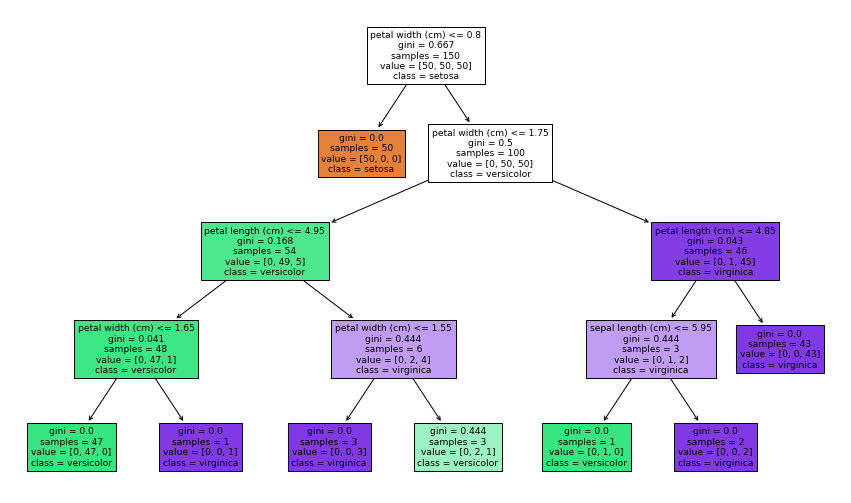

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

plt.figure(figsize=(15,9))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)